In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
from icecream import ic
import random

In [18]:
data = pd.read_csv("/home/sonn/Son/Workspace/IR_PhanLoaiNuocCam/IR/data/processed/data.csv", encoding="ISO-8859-1")
data.head()

,TenMau,648.5568,652.2841,656.0115,659.7388,663.4661,667.1935,670.9208,674.6481,678.3755,...,3965.8875,3969.6148,3973.3421,3977.0695,3980.7968,3984.5241,3988.2515,3991.9788,3995.7062,3999.4335
0,NA.23.xadoai.10,0.305598,0.301469,0.296560,0.291692,0.289974,0.287380,0.284316,0.278987,0.275145,...,-0.002144,-0.002139,-0.002075,-0.002154,-0.002012,-0.001937,-0.001972,-0.002195,-0.002218,-0.002093
1,BG.23.vinh.02,0.334148,0.326995,0.323069,0.320567,0.320840,0.319613,0.316539,0.312681,0.312266,...,0.007638,0.007602,0.007500,0.007479,0.007357,0.007200,0.007395,0.007561,0.007416,0.007212
2,NA.23.xadoai.03,0.431925,0.424417,0.420497,0.414126,0.408547,0.404646,0.402785,0.394614,0.391310,...,0.001096,0.001071,0.001132,0.001156,0.001213,0.001225,0.001119,0.000992,0.000941,0.001038
3,TQ.23.vinh.01,0.233424,0.229912,0.229714,0.229300,0.231312,0.229293,0.228230,0.227290,0.226978,...,0.015297,0.015310,0.015481,0.015362,0.015307,0.015477,0.015379,0.015176,0.015227,0.015108
4,VL.23.sanh.10,0.280723,0.276275,0.272200,0.266718,0.264426,0.264696,0.263036,0.257795,0.255794,...,-0.001905,-0.002035,-0.002084,-0.002143,-0.002178,-0.002196,-0.002110,-0.002060,-0.002029,-0.002010


In [19]:
X = data.iloc[:, 1:]
y = data["TenMau"]
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
# plt.figure(figsize=(12,4))
# plt.plot(X.iloc[:100, :].T, linewidth = 0.2)
# plt.xticks(X.columns[::5], rotation=90)
# plt.xlim((X.columns[0], X.columns[-1]))
# plt.xlabel("Wavenumber")
# plt.ylabel("Absorbance")
# plt.show()

In [21]:
X_derive = pd.DataFrame(savgol_filter(X, window_length=25, polyorder=3, deriv=1), columns=X.columns)

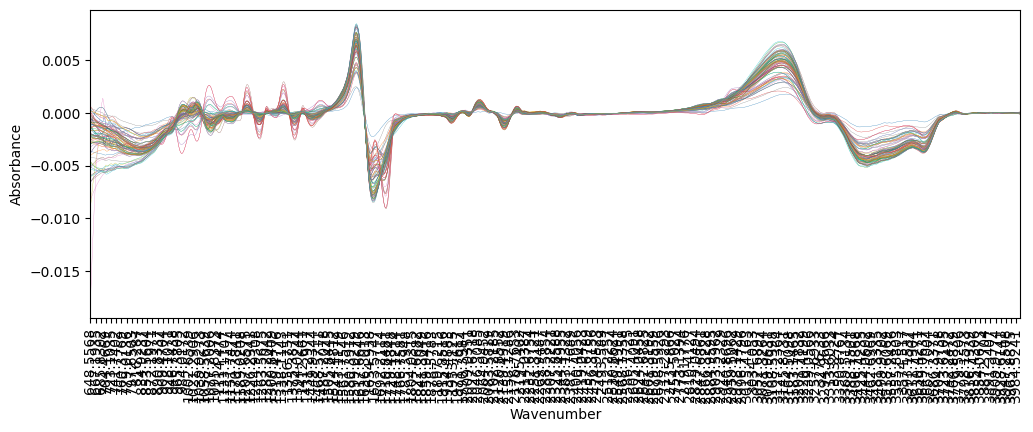

In [22]:
plt.figure(figsize=(12,4))
plt.plot(pd.DataFrame(X_derive.iloc[:100, :]).T, linewidth = 0.2)
plt.xticks(X.columns[::5], rotation=90)
plt.xlim((X.columns[0], X.columns[-1]))
plt.xlabel("Wavenumber")
plt.ylabel("Absorbance")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_derive, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

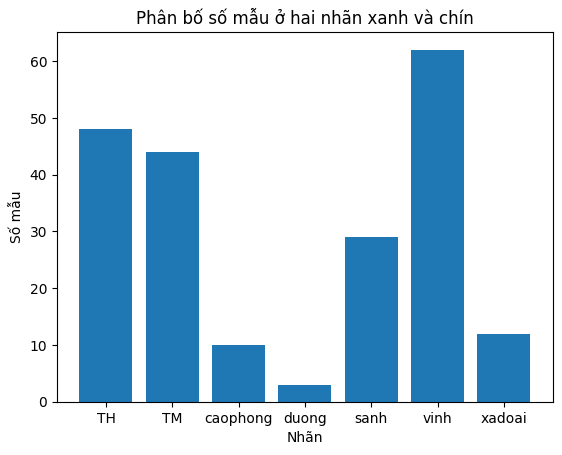

In [ ]:
# Count occurrences of each label
unique, counts = np.unique(y_train, return_counts=True)
labels = le.inverse_transform(unique)
# Plotting
plt.bar(labels, counts)
plt.xlabel('Nhãn')
plt.ylabel('Số mẫu')
plt.title('Phân bố số mẫu ở hai nhãn xanh và chín')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

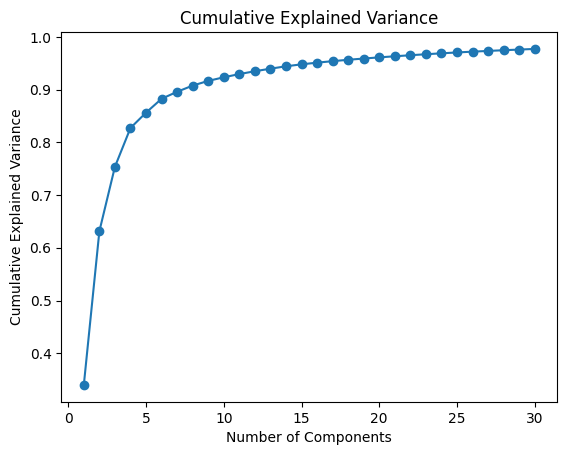

In [ ]:
pca = PCA(30)
pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

MO HINH MAY HOC

PCA-SVC

In [ ]:
pca = PCA()
svc = SVC()
pipeline = Pipeline(steps=[('pca', pca), ('svc', svc)])
param_grid = {
    'pca__n_components': [2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
}  
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

Fitting 5 folds for each of 92 candidates, totalling 460 fits
[CV 1/5] END pca__n_components=2, svc__kernel=rbf;, score=0.405 total time=   0.0s
[CV 2/5] END pca__n_components=2, svc__kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END pca__n_components=2, svc__kernel=rbf;, score=0.357 total time=   0.0s
[CV 4/5] END pca__n_components=2, svc__kernel=rbf;, score=0.390 total time=   0.0s
[CV 5/5] END pca__n_components=2, svc__kernel=rbf;, score=0.439 total time=   0.0s
[CV 1/5] END pca__n_components=2, svc__kernel=poly;, score=0.405 total time=   0.0s
[CV 2/5] END pca__n_components=2, svc__kernel=poly;, score=0.548 total time=   0.0s
[CV 3/5] END pca__n_components=2, svc__kernel=poly;, score=0.405 total time=   0.0s
[CV 4/5] END pca__n_components=2, svc__kernel=poly;, score=0.512 total time=   0.0s
[CV 5/5] END pca__n_components=2, svc__kernel=poly;, score=0.390 total time=   0.0s
[CV 1/5] END pca__n_components=2, svc__kernel=sigmoid;, score=0.429 total time=   0.0s
[CV 2/5] END pca

/home/sonn/.conda/envs/WSAIPython3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END pca__n_components=2, svc__kernel=linear;, score=0.500 total time=   0.0s
[CV 3/5] END pca__n_components=2, svc__kernel=linear;, score=0.333 total time=   0.0s
[CV 4/5] END pca__n_components=2, svc__kernel=linear;, score=0.415 total time=   0.0s
[CV 5/5] END pca__n_components=2, svc__kernel=linear;, score=0.512 total time=   0.0s
[CV 1/5] END pca__n_components=4, svc__kernel=rbf;, score=0.429 total time=   0.0s
[CV 2/5] END pca__n_components=4, svc__kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END pca__n_components=4, svc__kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END pca__n_components=4, svc__kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END pca__n_components=4, svc__kernel=rbf;, score=0.488 total time=   0.0s
[CV 1/5] END pca__n_components=4, svc__kernel=poly;, score=0.429 total time=   0.0s
[CV 2/5] END pca__n_components=4, svc__kernel=poly;, score=0.452 total time=   0.0s
[CV 3/5] END pca__n_components=4, svc__kernel=poly;, score=0.476 total ti

ic| grid.best_params_: {'pca__n_components': 16, 'svc__kernel': 'linear'}


[CV 3/5] END pca__n_components=28, svc__kernel=linear;, score=0.786 total time=   0.0s
[CV 4/5] END pca__n_components=28, svc__kernel=linear;, score=0.780 total time=   0.0s
[CV 5/5] END pca__n_components=28, svc__kernel=linear;, score=0.634 total time=   0.0s



Accuracy score: 0.75


PLS-DA

In [ ]:
param_grid = {'n_components': [2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]}  
pls = PLSRegression()
grid = GridSearchCV(pls, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<=0.5] = 0
print("Accuracy score:",accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV 1/5] END ....................n_components=2;, score=0.452 total time=   0.0s
[CV 2/5] END ....................n_components=2;, score=0.567 total time=   0.0s
[CV 3/5] END ....................n_components=2;, score=0.532 total time=   0.0s
[CV 4/5] END ....................n_components=2;, score=0.269 total time=   0.0s
[CV 5/5] END ....................n_components=2;, score=0.268 total time=   0.0s
[CV 1/5] END ....................n_components=4;, score=0.424 total time=   0.0s
[CV 2/5] END ....................n_components=4;, score=0.577 total time=   0.0s
[CV 3/5] END ....................n_components=4;, score=0.571 total time=   0.0s
[CV 4/5] END ....................n_components=4;, score=0.273 total time=   0.0s
[CV 5/5] END ....................n_components=4;, score=0.453 total time=   0.0s
[CV 1/5] END ....................n_components=6;, score=0.514 total time=   0.0s
[CV 2/5] END ....................n_components=6

ic| grid.best_params_: {'n_components': 4}


[CV 5/5] END ...................n_components=26;, score=0.351 total time=   0.0s
[CV 1/5] END ...................n_components=27;, score=0.300 total time=   0.0s
[CV 2/5] END ...................n_components=27;, score=0.360 total time=   0.0s
[CV 3/5] END ...................n_components=27;, score=0.536 total time=   0.0s
[CV 4/5] END ..................n_components=27;, score=-1.934 total time=   0.0s
[CV 5/5] END ...................n_components=27;, score=0.369 total time=   0.0s
[CV 1/5] END ...................n_components=28;, score=0.305 total time=   0.0s
[CV 2/5] END ...................n_components=28;, score=0.328 total time=   0.0s
[CV 3/5] END ...................n_components=28;, score=0.530 total time=   0.0s
[CV 4/5] END ..................n_components=28;, score=-1.488 total time=   0.0s
[CV 5/5] END ...................n_components=28;, score=0.385 total time=   0.0s



Accuracy score: 0.3076923076923077


PCA-DT

In [ ]:
pca = PCA()
dt = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('dt', dt)])
param_grid = {
    'pca__n_components': [2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV 1/5] END ...............pca__n_components=2;, score=0.429 total time=   0.0s
[CV 2/5] END ...............pca__n_components=2;, score=0.524 total time=   0.0s
[CV 3/5] END ...............pca__n_components=2;, score=0.619 total time=   0.0s
[CV 4/5] END ...............pca__n_components=2;, score=0.463 total time=   0.0s
[CV 5/5] END ...............pca__n_components=2;, score=0.390 total time=   0.0s
[CV 1/5] END ...............pca__n_components=4;, score=0.476 total time=   0.0s
[CV 2/5] END ...............pca__n_components=4;, score=0.524 total time=   0.0s
[CV 3/5] END ...............pca__n_components=4;, score=0.619 total time=   0.0s
[CV 4/5] END ...............pca__n_components=4;, score=0.512 total time=   0.0s
[CV 5/5] END ...............pca__n_components=4;, score=0.610 total time=   0.0s
[CV 1/5] END ...............pca__n_components=6;, score=0.643 total time=   0.0s
[CV 2/5] END ...............pca__n_components=6

/home/sonn/.conda/envs/WSAIPython3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END ..............pca__n_components=10;, score=0.595 total time=   0.0s
[CV 3/5] END ..............pca__n_components=10;, score=0.762 total time=   0.0s
[CV 4/5] END ..............pca__n_components=10;, score=0.659 total time=   0.0s
[CV 5/5] END ..............pca__n_components=10;, score=0.659 total time=   0.0s
[CV 1/5] END ..............pca__n_components=11;, score=0.476 total time=   0.0s
[CV 2/5] END ..............pca__n_components=11;, score=0.643 total time=   0.0s
[CV 3/5] END ..............pca__n_components=11;, score=0.738 total time=   0.0s
[CV 4/5] END ..............pca__n_components=11;, score=0.634 total time=   0.1s
[CV 5/5] END ..............pca__n_components=11;, score=0.707 total time=   0.0s
[CV 1/5] END ..............pca__n_components=12;, score=0.500 total time=   0.0s
[CV 2/5] END ..............pca__n_components=12;, score=0.643 total time=   0.0s
[CV 3/5] END ..............pca__n_components=12;, score=0.738 total time=   0.0s
[CV 4/5] END ..............p

ic| grid.best_params_: {'pca__n_components': 15}


[CV 4/5] END ..............pca__n_components=28;, score=0.561 total time=   0.0s
[CV 5/5] END ..............pca__n_components=28;, score=0.488 total time=   0.0s



Accuracy score: 0.5576923076923077


PCA-RANDOMFOREST

In [ ]:
pca = PCA()
rf = RandomForestClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('rf', rf)])
param_grid = {
    'pca__n_components': [2, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV 1/5] END ...............pca__n_components=2;, score=0.476 total time=   0.1s


/home/sonn/.conda/envs/WSAIPython3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END ...............pca__n_components=2;, score=0.619 total time=   0.2s
[CV 3/5] END ...............pca__n_components=2;, score=0.595 total time=   0.1s
[CV 4/5] END ...............pca__n_components=2;, score=0.561 total time=   0.1s
[CV 5/5] END ...............pca__n_components=2;, score=0.488 total time=   0.2s
[CV 1/5] END ...............pca__n_components=4;, score=0.595 total time=   0.1s
[CV 2/5] END ...............pca__n_components=4;, score=0.619 total time=   0.1s
[CV 3/5] END ...............pca__n_components=4;, score=0.690 total time=   0.1s
[CV 4/5] END ...............pca__n_components=4;, score=0.561 total time=   0.1s
[CV 5/5] END ...............pca__n_components=4;, score=0.707 total time=   0.1s
[CV 1/5] END ...............pca__n_components=6;, score=0.667 total time=   0.2s
[CV 2/5] END ...............pca__n_components=6;, score=0.667 total time=   0.1s
[CV 3/5] END ...............pca__n_components=6;, score=0.738 total time=   0.1s
[CV 4/5] END ...............

ic| grid.best_params_: {'pca__n_components': 19}


[CV 5/5] END ..............pca__n_components=28;, score=0.732 total time=   0.2s



Accuracy score: 0.75


PCA-ANN

In [ ]:
pca = PCA()
mlp = MLPClassifier()
pipeline = Pipeline(steps=[('pca', pca), ('mlp', mlp)])
param_grid = {
    'pca__n_components': [2, 4, 6, 8, 10, 11],
    'mlp__solver': ['adam'], 
    'mlp__hidden_layer_sizes': [(10, 10), (20, 20), (5,5)], 
    'mlp__batch_size': [8, 12, 10, 16 ,24, 64],
    'mlp__solver' : ['relu', 'tanh'],
    'mlp__early_stopping': [True],
}
grid = GridSearchCV(pipeline, param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train) 
print("\n\n")
ic(grid.best_params_) 
model = grid.best_estimator_
model.fit(X_train, y_train)
print("Accuracy score:",accuracy_score(y_test, model.predict(X_test)))


Fitting 5 folds for each of 552 candidates, totalling 2760 fits
[CV 1/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=2;, score=0.333 total time=   0.1s
[CV 2/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=2;, score=0.167 total time=   0.0s
[CV 3/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=2;, score=0.048 total time=   0.0s


/home/sonn/.conda/envs/WSAIPython3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 4/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=2;, score=0.390 total time=   0.1s
[CV 5/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=2;, score=0.341 total time=   0.1s
[CV 1/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=4;, score=0.405 total time=   0.1s
[CV 2/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=4;, score=0.262 total time=   0.1s
[CV 3/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=4;, score=0.405 total time=   0.2s
[CV 4/5] END mlp__batch_size=8, mlp__early_stopping=True, mlp__hidden_layer_sizes=(10, 10), mlp__solver=adam, pca__n_components=4;, score=0.512 total time=   0.1s
[CV 5/5] END mlp__batc

ic| grid.best_params_: {'mlp__batch_size': 8,
                        'mlp__early_stopping': True,
                        'mlp__hidden_layer_sizes': (20, 20),
                        'mlp__solver': 'adam',
                        'pca__n_components': 23}





Accuracy score: 0.5384615384615384
